In [1]:
import pandas as pd
import numpy as np
import seaborn as sns



In [2]:
from sklearn.model_selection import train_test_split
from scipy import stats

from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
plt.rcParams.update({'figure.figsize' : (12.0, 8.0)})
plt.rcParams.update({'font.size' : 14})

In [3]:
#Fetching the pre processed dataset
columns=['µStrain', 'µStrain.1', 'µStrain.2', 'µStrain.3', 'µStrain.4', 'µStrain.5', 'µStrain.6', 'µStrain.7', 'µStrain.8', 'µStrain.9', 'µStrain.10', 'µStrain.11', 'µStrain.12', 'µStrain.13', 'µStrain.14', 'µStrain.15', 'µStrain.16', 'µStrain.17', 'µStrain.18', 'µStrain.19', 'µStrain.20', 'µStrain.21', 'µStrain.22', 'µStrain.23', 'µStrain.24', 'µStrain.25', 'µStrain.26', 'µStrain.27', 'µStrain.28', 'µStrain.29', 'µStrain.30', 'µStrain.31', 'µStrain.32', 'µStrain.33', 'µStrain.34', 'µStrain.35', 'µStrain.36', 'µStrain.37', 'µStrain.38', 'µStrain.39', 'µStrain.40', 'µStrain.41', 'µStrain.42', 'µStrain.43', 'µStrain.44', 'µStrain.45', 'µStrain.46', 'µStrain.47', 'µStrain.48', 'µStrain.49', 'µStrain.50', 'µStrain.51', 'µStrain.52', 'µStrain.53','µStrain.54','µStrain.55','µStrain.56','µStrain.57','µStrain.58','µStrain.59','µStrain.60','µStrain.61', 'Target']
df = pd.read_parquet('/Users/piyush/StudienArbeit/df_u.parquet',columns=columns) 
df = df.dropna()
values = ['0.0-_LL-FXXf', '0.6-_LL-FXXf', '0.2-_LL-FXXf', '0.4-_LL-FXXf', '0.5-_LL-FXXf', '0.65-_LL-FXXf', '0.7-_LL-FXXf', '0.75-_LL-FXXf' 
, '0.0-_LL-LBLf', '0.6-_LL-LBLf', '0.2-_LL-LBLf', '0.4-_LL-LBLf', '0.5-_LL-LBLf', '0.65-_LL-LBLf', '0.7-_LL-LBLf', '0.75-_LL-LBLf'
, '0.0-_LL-VBDf', '0.6-_LL-VBDf', '0.2-_LL-VBDf', '0.4-_LL-VBDf', '0.5-_LL-VBDf', '0.65-_LL-VBDf', '0.7-_LL-VBDf', '0.75-_LL-VBDf']
df = df[df.Target.isin(values) == True]


print('Shape of the dataset:' +str(df.shape) )
print(df.head(-5))
print(df['Target'].unique())



Shape of the dataset:(4239538, 63)
         µStrain  µStrain.1  µStrain.2  µStrain.3  µStrain.4  µStrain.5  \
0          399.5      384.2      541.4      500.2      305.5      315.7   
1          402.6      386.2      544.2      502.2      305.8      317.1   
2          400.5      385.9      541.4      502.3      304.6      315.9   
3          400.6      384.9      541.5      501.6      304.0      316.2   
4          401.5      385.2      541.4      502.1      303.8      316.6   
...          ...        ...        ...        ...        ...        ...   
4240273    335.2      320.2      486.5      431.1      279.5      267.5   
4240274    335.2      320.2      486.5      431.1      279.5      267.5   
4240275    335.7      319.5      486.5      431.3      278.4      267.1   
4240276    335.7      319.5      486.5      431.3      278.4      267.1   
4240277    335.7      319.5      486.5      431.3      278.4      267.1   

         µStrain.6  µStrain.7  µStrain.8  µStrain.9  ...  µStrai

In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Target'] = label_encoder.fit_transform(df.loc[:,'Target'])
print(df['Target'].unique())
print(df['Target'].value_counts())
y = df['Target']
print(y)

[10 13 16 19 22  7  2  5  8 11 14 17 20 23  0  3  6  9 12 15 18 21  1  4]
Target
0     310642
12    310612
6     310606
13    309407
2     309401
7     300926
21    206869
8     206275
22    206271
14    206271
23    206264
4     116306
18    103740
15    103740
9     103738
3     103370
20    103140
11    103140
17    103139
16    103139
19    103138
1     103136
10    103136
5     103132
Name: count, dtype: int64
0          10
1          10
2          10
3          10
4          10
           ..
4240278     7
4240279     7
4240280     4
4240281     4
4240282     4
Name: Target, Length: 4239538, dtype: int64


In [5]:
#Detecting outliers
'''print("Mean value of strain",df1['µStrain'].mean())
print("Standard deviation of strain",df1['µStrain'].std())
print("Minimum value of strain",df1['µStrain'].min())
print("Maximum value of strain",df1['µStrain'].max())

print("Upper limit",df1['µStrain'].mean() + 3*df1['µStrain'].std())
print("Lower limit",df1['µStrain'].mean() - 3*df1['µStrain'].std())


df1[(df1['µStrain'] > 410.45) | (df1['µStrain'] < -307.57)]

newdf = df1[(df1['µStrain'] < 410.45) & (df1['µStrain'] > -307.57)]
print(newdf)'''

'print("Mean value of strain",df1[\'µStrain\'].mean())\nprint("Standard deviation of strain",df1[\'µStrain\'].std())\nprint("Minimum value of strain",df1[\'µStrain\'].min())\nprint("Maximum value of strain",df1[\'µStrain\'].max())\n\nprint("Upper limit",df1[\'µStrain\'].mean() + 3*df1[\'µStrain\'].std())\nprint("Lower limit",df1[\'µStrain\'].mean() - 3*df1[\'µStrain\'].std())\n\n\ndf1[(df1[\'µStrain\'] > 410.45) | (df1[\'µStrain\'] < -307.57)]\n\nnewdf = df1[(df1[\'µStrain\'] < 410.45) & (df1[\'µStrain\'] > -307.57)]\nprint(newdf)'

In [6]:
'''outliers = df1[(np.abs(zscore(df1)) > 3).all(axis=1)]
df2 = df1[(np.abs(zscore(df1)) <= 3). all(axis=1)]
print('Shape of the dataset:' +str(df2.shape) )'''


"outliers = df1[(np.abs(zscore(df1)) > 3).all(axis=1)]\ndf2 = df1[(np.abs(zscore(df1)) <= 3). all(axis=1)]\nprint('Shape of the dataset:' +str(df2.shape) )"

In [7]:
#Confirming if the data is normalised
print(df.iloc[:, :-1].min().value_counts())
print(df.iloc[:, :-1].max().value_counts())

-30.1      2
-17.0      2
-20.1      2
-34.4      2
-16.6      1
-22.3      1
-216.8     1
-210.2     1
-1.9       1
-212.8     1
-29.7      1
-621.6     1
-27.4      1
-50.1      1
-630.9     1
-348.5     1
-23.7      1
-851.1     1
-119.7     1
-27.5      1
-17.7      1
-17.5      1
-12.7      1
-438.7     1
-66.4      1
-61.5      1
-71.4      1
-74.2      1
-169.8     1
-550.2     1
-1096.6    1
-981.9     1
-121.1     1
-32.8      1
-55.4      1
-349.0     1
-9.2       1
-17.9      1
-435.8     1
-16.3      1
-31.8      1
-420.8     1
-24.3      1
-280.0     1
-347.2     1
-7.7       1
-101.5     1
-361.9     1
-10.5      1
-78.6      1
-12.6      1
-5.0       1
-11.2      1
-13.5      1
-8.6       1
-11.7      1
-3.6       1
-56.0      1
Name: count, dtype: int64
1892.3    1
80.9      1
915.8     1
1631.8    1
1476.6    1
         ..
1283.2    1
1010.7    1
1054.7    1
1947.6    1
101.1     1
Name: count, Length: 62, dtype: int64


In [8]:
#Splitting the data into dependent and independent variables
X = df.iloc[:, 0:61].values
y = df.iloc[: , 62].values

print('The independent feature set: ')
print(X[:5, :])
print('The dependent variable: ')
print(y[:-5])


The independent feature set: 
[[ 399.5  384.2  541.4  500.2  305.5  315.7  316.    68.8  -90.4  370.
   270.4   71.7 -139.7  127.5   52.9  195.4  111.4  -53.8  129.5   -7.8
  -105.5  192.6  106.1  156.7  127.2  276.6  215.6  189.9  361.   416.1
  -113.4 -122.1  -89.5  225.9  325.2  254.6  164.4   20.4  197.3   37.5
   -75.4  193.3   26.3  -87.9  308.6  163.3  -67.3  178.4   65.7   67.4
    20.7   71.3  191.4  229.1   74.4  -62.6   39.4   57.3   34.5   14.7
    29.7]
 [ 402.6  386.2  544.2  502.2  305.8  317.1  316.7   69.6  -89.7  370.7
   271.4   72.2 -139.4  127.6   52.8  195.3  111.2  -53.5  129.9   -6.6
  -105.8  193.1  107.1  157.4  127.7  277.2  215.8  191.1  361.6  416.1
  -113.2 -121.4  -89.   225.3  325.8  254.2  164.5   21.4  197.8   37.7
   -74.8  194.    26.8  -88.5  309.3  163.9  -67.1  180.1   65.2   67.5
    20.5   72.   192.6  230.1   75.1  -63.    39.6   58.2   34.6   14.7
    29.3]
 [ 400.5  385.9  541.4  502.3  304.6  315.9  315.8   68.5  -90.5  371.7
   272.    72.1

In [9]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
print(train_data.shape)
print(test_data.shape)

(3391630, 63)
(847908, 63)


In [10]:
#splitting the dataset into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print ('Feature Training Set:', X_train.shape)
print('Feature Testing Set:', X_test.shape)
print('Label Trainhing Set:', y_train.shape)
print('Label Testing Set:', y_test.shape)


Feature Training Set: (3391630, 61)
Feature Testing Set: (847908, 61)
Label Trainhing Set: (3391630,)
Label Testing Set: (847908,)


In [11]:
#Fitting Decision tree classifier to the training data
classifier = RandomForestClassifier(n_estimators=600,criterion='gini', max_features= 'sqrt', max_depth= 6, random_state=18)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=600, random_state=18)

In [12]:
#Predicting the test set result
predictions = classifier.predict(X_test)
test_classes = sorted(np.unique(predictions))
predictions
print('accuracy:', accuracy_score(y_test,predictions))




accuracy: 0.8543863249314784


In [13]:
unique = np.unique(y_train)
print(unique)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [14]:
from sklearn.discriminant_analysis import unique_labels


def plot(y_test, predictions):
    labels = unique_labels(y_test)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test, predictions),
                         columns = columns, index = index)
    return table
plot(y_test, predictions)

,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9,...,Predicted 14,Predicted 15,Predicted 16,Predicted 17,Predicted 18,Predicted 19,Predicted 20,Predicted 21,Predicted 22,Predicted 23
Actual 0,61991,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual 1,0,20471,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual 2,0,0,61615,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual 3,0,0,0,0,0,0,0,0,0,0,...,20534,0,0,0,0,0,0,0,0,0
Actual 4,0,0,0,0,23181,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual 5,0,0,0,0,0,510,0,0,20137,0,...,0,0,0,0,0,0,0,0,0,0
Actual 6,0,0,0,0,0,0,62275,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual 7,0,0,0,0,0,0,0,59856,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual 8,0,0,0,0,0,0,0,0,41180,0,...,0,0,0,0,0,0,0,0,0,0
Actual 9,0,0,0,0,0,0,0,0,0,20562,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Confusion Matrix for Load Condition')


<Axes: title={'center': 'Confusion Matrix for Load Condition'}>

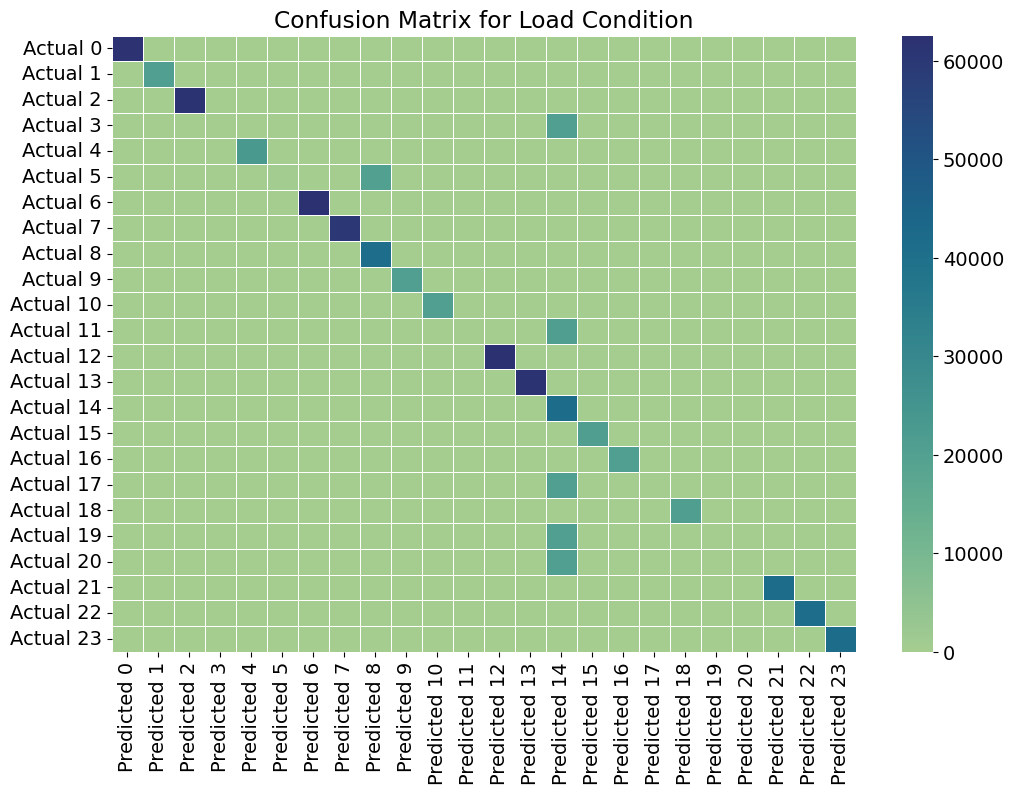

In [15]:
#getting dataframe labels

from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

#combine labels with confusion matrix
def plot(y_test, predictions):
    labels = unique_labels(y_test)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test, predictions),
                         columns = columns, index = index)
    return sns.heatmap(table, annot=False,fmt='d', cmap='crest', linewidths=0.5)
print(plt.title('Confusion Matrix for Load Condition'))
plot(y_test, predictions)

In [16]:
#print(classification_report(y_test, predictions))

#It does not consider each class individually, It calculates the metrices globally
precision_micro = precision_score(y_test, predictions, average='micro')
f1_micro = f1_score(y_test,predictions, average='micro')
recall_micro = recall_score(y_test, predictions, average='micro')
print('Micro Precission: ', precision_micro)
print('Micro F1-Score: ', f1_micro)
print('Micro Recall: ', recall_micro)

#Macro calculates recall for each class individually and then takes unweighted mean of the measures
precision_macro = precision_score(y_test, predictions, average='macro')
f1_macro = f1_score(y_test,predictions, average='macro')
recall_macro = recall_score(y_test, predictions, average='macro')
print('Macro Precission: ', precision_macro)
print('Macro F1-Score: ', f1_macro)
print('Macro Recall: ', recall_macro)



Micro Precission:  0.8543863249314784
Micro F1-Score:  0.8543863249314784
Micro Recall:  0.8543863249314784


/Users/piyush/StudienArbeit/Arbeit-venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Macro Precission:  0.7482274919885289
Macro F1-Score:  0.7206828536560899
Macro Recall:  0.7510292052114108
